<a href="https://colab.research.google.com/github/grayhacked/AI/blob/Second_Branch/ML1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/data_technicien.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Scenario,Correct,Timestamp,Datetime,t1_casque,t1_visiere,t1_col,t1_gant_gauche,t1_gant_droit,t2_casque,t2_visiere,t2_veste,t2_col,danger
0,1,1,1626949343,2021-07-22 10:22:23,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
1,1,1,1626949359,2021-07-22 10:22:39,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
2,1,1,1626949374,2021-07-22 10:22:54,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
3,1,1,1626949389,2021-07-22 10:23:09,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
4,1,1,1626949405,2021-07-22 10:23:25,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0


In [5]:
# Aperçu des données
print(data.head())
print(data.info())

   Scenario  Correct   Timestamp             Datetime  t1_casque  t1_visiere  \
0         1        1  1626949343  2021-07-22 10:22:23        0.0         0.0   
1         1        1  1626949359  2021-07-22 10:22:39        0.0         0.0   
2         1        1  1626949374  2021-07-22 10:22:54        0.0         0.0   
3         1        1  1626949389  2021-07-22 10:23:09        0.0         0.0   
4         1        1  1626949405  2021-07-22 10:23:25        0.0         0.0   

   t1_col  t1_gant_gauche  t1_gant_droit  t2_casque  t2_visiere  t2_veste  \
0     0.0             0.0            0.0        NaN         NaN       NaN   
1     0.0             0.0            0.0        NaN         NaN       NaN   
2     0.0             0.0            0.0        NaN         NaN       NaN   
3     0.0             0.0            0.0        NaN         NaN       NaN   
4     0.0             0.0            0.0        NaN         NaN       NaN   

   t2_col  danger  
0     NaN       0  
1     NaN       

In [6]:
# Vérifier les valeurs manquantes
print(data.isnull().sum())

Scenario            0
Correct             0
Timestamp           0
Datetime            0
t1_casque         168
t1_visiere        168
t1_col            168
t1_gant_gauche    168
t1_gant_droit     168
t2_casque         225
t2_visiere        225
t2_veste          225
t2_col            225
danger              0
dtype: int64


In [7]:
# Filtrer les données du technicien 1
technicien_1 = data[data[['t2_casque', 't2_visiere', 't2_veste', 't2_col']].isna().all(axis=1)]

# Supprimer les colonnes relatives au technicien 2
technicien_1 = technicien_1.drop(columns=['t2_casque', 't2_visiere', 't2_veste', 't2_col'])

# Aperçu des données du technicien 1
technicien_1.head()


,Scenario,Correct,Timestamp,Datetime,t1_casque,t1_visiere,t1_col,t1_gant_gauche,t1_gant_droit,danger
0,1,1,1626949343,2021-07-22 10:22:23,0.0,0.0,0.0,0.0,0.0,0
1,1,1,1626949359,2021-07-22 10:22:39,0.0,0.0,0.0,0.0,0.0,0
2,1,1,1626949374,2021-07-22 10:22:54,0.0,0.0,0.0,0.0,0.0,0
3,1,1,1626949389,2021-07-22 10:23:09,0.0,0.0,0.0,0.0,0.0,0
4,1,1,1626949405,2021-07-22 10:23:25,0.0,0.0,0.0,0.0,0.0,0


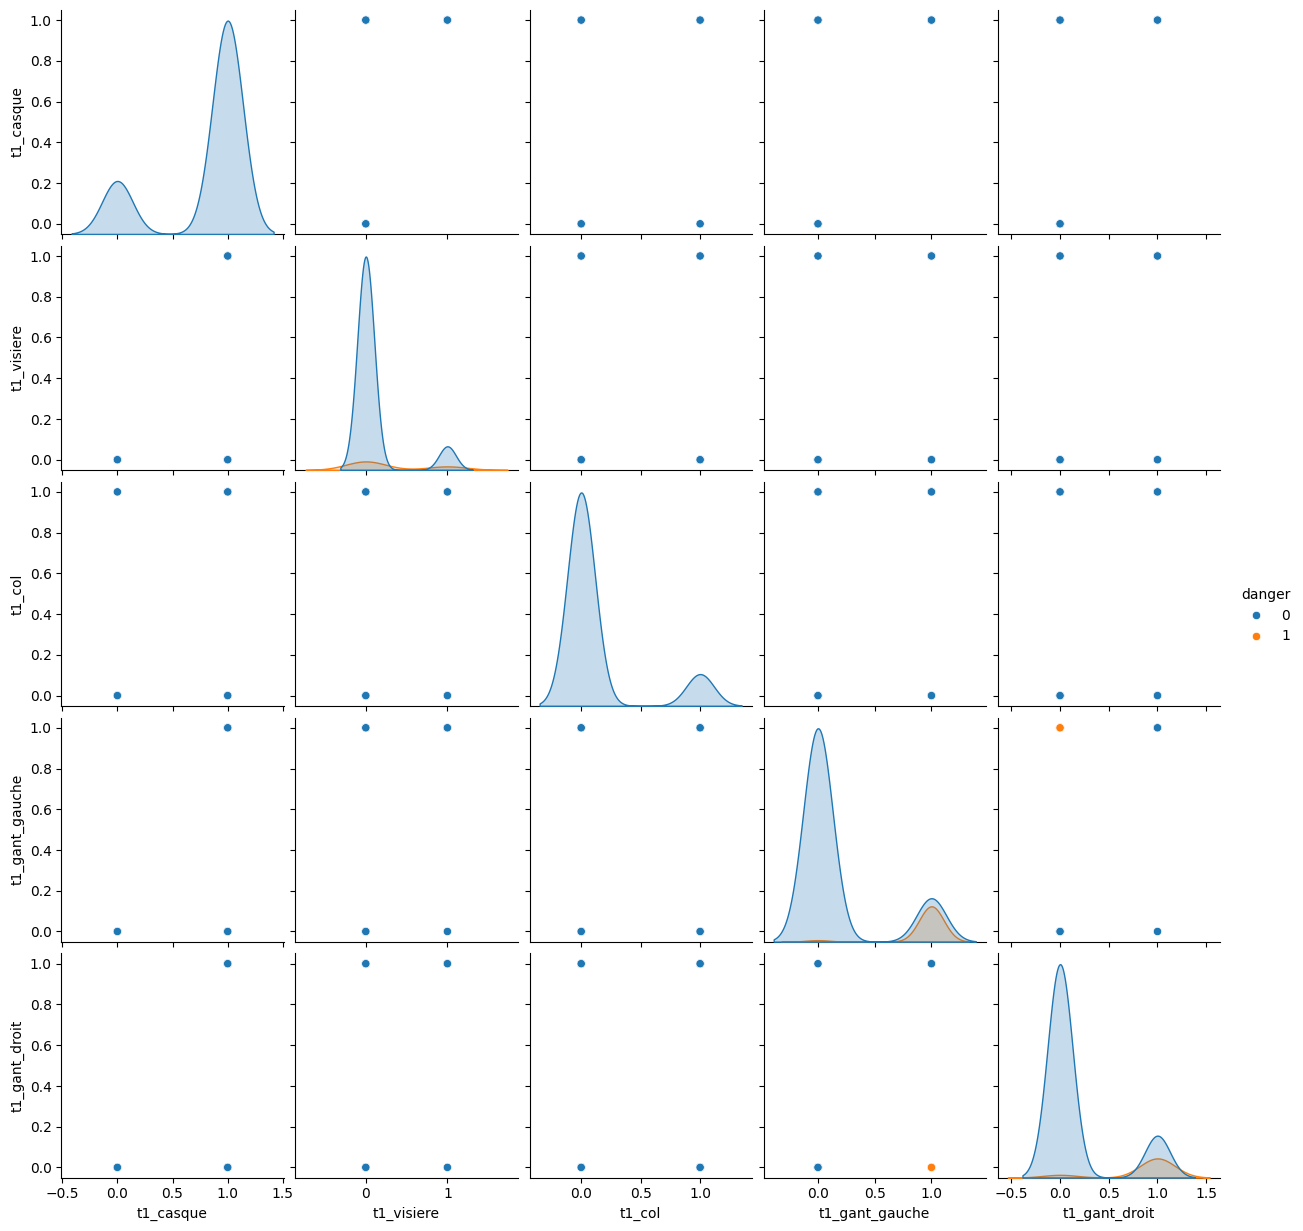

In [8]:
# Pairplot pour examiner les relations
sns.pairplot(technicien_1, hue='danger', vars=['t1_casque', 't1_visiere', 't1_col', 't1_gant_gauche', 't1_gant_droit'])
plt.show()

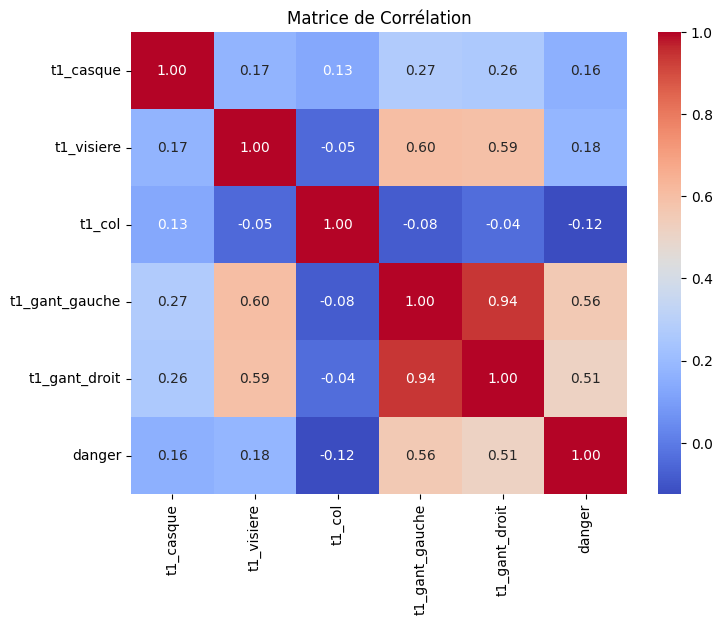

In [9]:
# Matrice de corrélation
correlation_matrix = technicien_1[['t1_casque', 't1_visiere', 't1_col', 't1_gant_gauche', 't1_gant_droit', 'danger']].corr()

# Heatmap des corrélations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

In [10]:
technicien_1.head()

,Scenario,Correct,Timestamp,Datetime,t1_casque,t1_visiere,t1_col,t1_gant_gauche,t1_gant_droit,danger
0,1,1,1626949343,2021-07-22 10:22:23,0.0,0.0,0.0,0.0,0.0,0
1,1,1,1626949359,2021-07-22 10:22:39,0.0,0.0,0.0,0.0,0.0,0
2,1,1,1626949374,2021-07-22 10:22:54,0.0,0.0,0.0,0.0,0.0,0
3,1,1,1626949389,2021-07-22 10:23:09,0.0,0.0,0.0,0.0,0.0,0
4,1,1,1626949405,2021-07-22 10:23:25,0.0,0.0,0.0,0.0,0.0,0


danger
0    201
1     24
Name: count, dtype: int64


<Axes: xlabel='danger'>

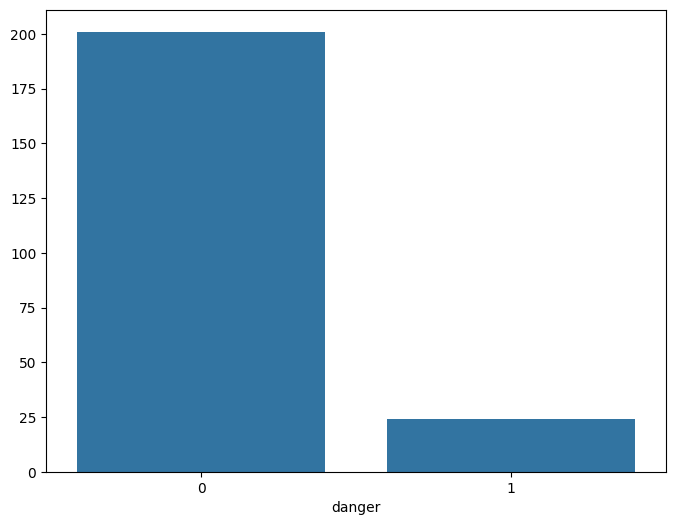

In [11]:
#Calculer le nombre de cas de Danger pour le technicien 1
danger_count = technicien_1['danger'].value_counts()

# Afficher le résultat
print(danger_count)


# Tracer un diagramme en barres
plt.figure(figsize=(8, 6))
sns.barplot(x=danger_count.index, y=danger_count.values)

In [12]:
# Filtrer les cas dangereux
cas_dangereux = technicien_1[technicien_1['danger'] == 1]
cas_dangereux

,Scenario,Correct,Timestamp,Datetime,t1_casque,t1_visiere,t1_col,t1_gant_gauche,t1_gant_droit,danger
110,1,0,1626951312,2021-07-22 10:55:12,1.0,0.0,0.0,1.0,0.0,1
111,1,0,1626951328,2021-07-22 10:55:28,1.0,0.0,0.0,1.0,1.0,1
112,1,0,1626951343,2021-07-22 10:55:43,1.0,0.0,0.0,1.0,1.0,1
113,1,0,1626951358,2021-07-22 10:55:58,1.0,0.0,0.0,1.0,1.0,1
114,1,0,1626951374,2021-07-22 10:56:14,1.0,0.0,0.0,1.0,1.0,1
115,1,0,1626951389,2021-07-22 10:56:29,1.0,1.0,0.0,1.0,1.0,1
116,1,0,1626951404,2021-07-22 10:56:44,1.0,0.0,0.0,1.0,1.0,1
117,1,0,1626951420,2021-07-22 10:57:00,1.0,0.0,0.0,1.0,1.0,1
118,1,0,1626951435,2021-07-22 10:57:15,1.0,0.0,0.0,1.0,1.0,1
119,1,0,1626951451,2021-07-22 10:57:31,1.0,1.0,0.0,1.0,0.0,1


In [13]:
cas_non_dangereux = technicien_1[technicien_1['danger'] == 0]
cas_non_dangereux

,Scenario,Correct,Timestamp,Datetime,t1_casque,t1_visiere,t1_col,t1_gant_gauche,t1_gant_droit,danger
0,1,1,1626949343,2021-07-22 10:22:23,0.0,0.0,0.0,0.0,0.0,0
1,1,1,1626949359,2021-07-22 10:22:39,0.0,0.0,0.0,0.0,0.0,0
2,1,1,1626949374,2021-07-22 10:22:54,0.0,0.0,0.0,0.0,0.0,0
3,1,1,1626949389,2021-07-22 10:23:09,0.0,0.0,0.0,0.0,0.0,0
4,1,1,1626949405,2021-07-22 10:23:25,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
388,6,1,1626101699,2021-07-12 14:54:59,1.0,0.0,0.0,0.0,0.0,0
389,6,1,1626101725,2021-07-12 14:55:25,1.0,0.0,0.0,1.0,1.0,0
390,6,1,1626101750,2021-07-12 14:55:50,1.0,0.0,0.0,1.0,1.0,0
391,6,1,1626101776,2021-07-12 14:56:16,1.0,1.0,0.0,1.0,1.0,0


In [14]:
# Filtrer les données du technicien 2
technicien_2 = data[data[['t1_casque',	't1_visiere',	't1_col',	't1_gant_gauche',	't1_gant_droit']].isna().all(axis=1)]

# Supprimer les colonnes relatives au technicien 1
technicien_2 = technicien_2.drop(columns=['t1_casque',	't1_visiere',	't1_col',	't1_gant_gauche',	't1_gant_droit'])

# Aperçu des données du technicien 2
technicien_2.head()

,Scenario,Correct,Timestamp,Datetime,t2_casque,t2_visiere,t2_veste,t2_col,danger
159,5,1,1626964442,2021-07-22 14:34:02,0.0,0.0,0.0,0.0,0
160,5,1,1626964457,2021-07-22 14:34:17,0.0,0.0,0.0,0.0,0
161,5,1,1626964473,2021-07-22 14:34:33,0.0,0.0,0.0,0.0,0
162,5,1,1626964488,2021-07-22 14:34:48,0.0,0.0,0.0,0.0,0
163,5,1,1626964504,2021-07-22 14:35:04,0.0,0.0,0.0,0.0,0


danger
0    132
1     36
Name: count, dtype: int64


<Axes: xlabel='danger'>

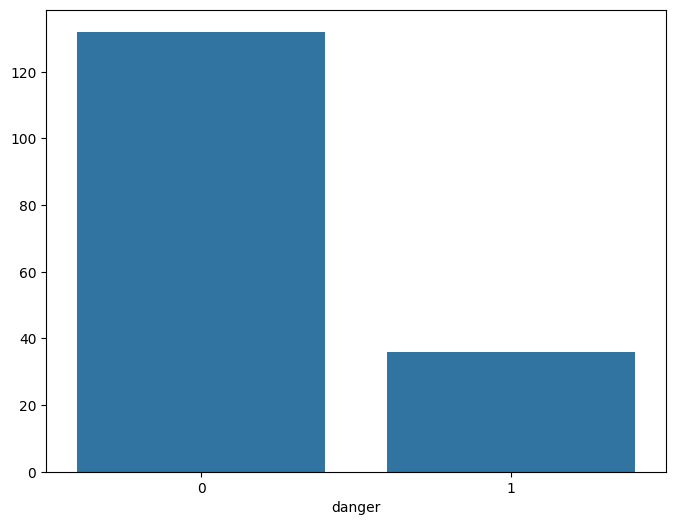

In [15]:
#Calculer le nombre de cas de Danger pour le technicien 1
danger_count = technicien_2['danger'].value_counts()

# Afficher le résultat
print(danger_count)


# Tracer un diagramme en barres
plt.figure(figsize=(8, 6))
sns.barplot(x=danger_count.index, y=danger_count.values)

In [16]:
# Filtrer les cas dangereux
cas_dangereux = technicien_2[technicien_2['danger'] == 1]
cas_dangereux

,Scenario,Correct,Timestamp,Datetime,t2_casque,t2_visiere,t2_veste,t2_col,danger
189,5,0,1626965582,2021-07-22 14:53:02,0.0,0.0,0.0,0.0,1
190,5,0,1626965597,2021-07-22 14:53:17,0.0,0.0,0.0,0.0,1
191,5,0,1626965613,2021-07-22 14:53:33,0.0,0.0,0.0,0.0,1
192,5,0,1626965628,2021-07-22 14:53:48,0.0,0.0,0.0,0.0,1
251,1,0,1626087187,2021-07-12 10:53:07,0.0,0.0,0.0,0.0,1
252,1,0,1626087213,2021-07-12 10:53:33,0.0,0.0,0.0,0.0,1
253,1,0,1626087239,2021-07-12 10:53:59,0.0,0.0,0.0,0.0,1
254,1,0,1626087264,2021-07-12 10:54:24,0.0,0.0,0.0,0.0,1
255,1,0,1626087290,2021-07-12 10:54:50,0.0,0.0,0.0,0.0,1
256,1,0,1626087316,2021-07-12 10:55:16,0.0,0.0,0.0,0.0,1


In [22]:
#Isolation forest pour le technicien 1
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Prétraitement des données

colonnes_utiles = ['Timestamp','t1_casque', 't1_visiere', 't1_col', 't1_gant_gauche', 't1_gant_droit','danger']
X = technicien_1[colonnes_utiles]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Créez un modèle Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.11, random_state=42)

#Entrainer le modele
model.fit(X_scaled)




IsolationForest(contamination=0.11, random_state=42)

In [23]:
# Prédire les étiquettes
labels = model.predict(X_scaled)

# Ajouter les étiquettes au DataFrame original
technicien_1['is_anomaly'] = labels

# Afficher le nombre d'anomalies détectées
print(technicien_1['is_anomaly'].value_counts())


is_anomaly
 1    200
-1     25
Name: count, dtype: int64


In [24]:
# Filtrer les anomalies
anomalies = technicien_1[technicien_1['is_anomaly'] == -1]

# Examiner les caractéristiques des anomalies
print(anomalies.describe())
anomalies

        Scenario    Correct     Timestamp  t1_casque  t1_visiere     t1_col  \
count  25.000000  25.000000  2.500000e+01  25.000000   25.000000  25.000000   
mean    2.760000   0.440000  1.626473e+09   0.880000    0.440000   0.320000   
std     1.234234   0.506623  4.328154e+05   0.331662    0.506623   0.476095   
min     1.000000   0.000000  1.626089e+09   0.000000    0.000000   0.000000   
25%     2.000000   0.000000  1.626100e+09   1.000000    0.000000   0.000000   
50%     3.000000   0.000000  1.626100e+09   1.000000    0.000000   0.000000   
75%     4.000000   1.000000  1.626951e+09   1.000000    1.000000   1.000000   
max     6.000000   1.000000  1.626952e+09   1.000000    1.000000   1.000000   

       t1_gant_gauche  t1_gant_droit     danger  is_anomaly  
count       25.000000           25.0  25.000000        25.0  
mean         0.720000            0.6   0.440000        -1.0  
std          0.458258            0.5   0.506623         0.0  
min          0.000000            0.0   0

,Scenario,Correct,Timestamp,Datetime,t1_casque,t1_visiere,t1_col,t1_gant_gauche,t1_gant_droit,danger,is_anomaly
32,1,1,1626949836,2021-07-22 10:30:36,1.0,0.0,0.0,1.0,0.0,0,-1
69,2,1,1626950600,2021-07-22 10:43:20,0.0,0.0,1.0,0.0,0.0,0,-1
88,2,1,1626950893,2021-07-22 10:48:13,1.0,1.0,0.0,1.0,1.0,0,-1
90,2,1,1626950924,2021-07-22 10:48:44,1.0,0.0,0.0,1.0,0.0,0,-1
110,1,0,1626951312,2021-07-22 10:55:12,1.0,0.0,0.0,1.0,0.0,1,-1
115,1,0,1626951389,2021-07-22 10:56:29,1.0,1.0,0.0,1.0,1.0,1,-1
119,1,0,1626951451,2021-07-22 10:57:31,1.0,1.0,0.0,1.0,0.0,1,-1
144,2,0,1626951840,2021-07-22 11:04:00,1.0,1.0,0.0,1.0,1.0,1,-1
145,2,0,1626951856,2021-07-22 11:04:16,1.0,1.0,0.0,1.0,1.0,1,-1
146,2,0,1626951871,2021-07-22 11:04:31,1.0,0.0,0.0,1.0,1.0,1,-1


In [28]:
#Filtrer les nom anomalies
N_anomalies = technicien_1[technicien_1['is_anomaly'] == 1]
print(N_anomalies.describe())
N_anomalies


         Scenario     Correct     Timestamp   t1_casque  t1_visiere    t1_col  \
count  200.000000  200.000000  2.000000e+02  200.000000  200.000000  200.0000   
mean     1.970000    0.635000  1.626729e+09    0.815000    0.080000    0.0900   
std      1.185804    0.482638  3.755478e+05    0.389272    0.271974    0.2869   
min      1.000000    0.000000  1.626089e+09    0.000000    0.000000    0.0000   
25%      1.000000    0.000000  1.626102e+09    1.000000    0.000000    0.0000   
50%      2.000000    1.000000  1.626950e+09    1.000000    0.000000    0.0000   
75%      3.000000    1.000000  1.626951e+09    1.000000    0.000000    0.0000   
max      6.000000    1.000000  1.626952e+09    1.000000    1.000000    1.0000   

       t1_gant_gauche  t1_gant_droit      danger  is_anomaly  
count      200.000000     200.000000  200.000000       200.0  
mean         0.195000       0.195000    0.065000         1.0  
std          0.397195       0.397195    0.247144         0.0  
min          0.000

,Scenario,Correct,Timestamp,Datetime,t1_casque,t1_visiere,t1_col,t1_gant_gauche,t1_gant_droit,danger,is_anomaly
0,1,1,1626949343,2021-07-22 10:22:23,0.0,0.0,0.0,0.0,0.0,0,1
1,1,1,1626949359,2021-07-22 10:22:39,0.0,0.0,0.0,0.0,0.0,0,1
2,1,1,1626949374,2021-07-22 10:22:54,0.0,0.0,0.0,0.0,0.0,0,1
3,1,1,1626949389,2021-07-22 10:23:09,0.0,0.0,0.0,0.0,0.0,0,1
4,1,1,1626949405,2021-07-22 10:23:25,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
387,6,1,1626101674,2021-07-12 14:54:34,1.0,0.0,0.0,0.0,0.0,0,1
388,6,1,1626101699,2021-07-12 14:54:59,1.0,0.0,0.0,0.0,0.0,0,1
389,6,1,1626101725,2021-07-12 14:55:25,1.0,0.0,0.0,1.0,1.0,0,1
390,6,1,1626101750,2021-07-12 14:55:50,1.0,0.0,0.0,1.0,1.0,0,1


In [36]:
from sklearn.metrics import confusion_matrix, classification_report

# Alignement des prédictions avec le label 'danger'
technicien_1['predicted_danger'] = technicien_1['is_anomaly'].replace({-1: 1, 1: 0})
y_true = technicien_1['danger']
y_pred = technicien_1['predicted_danger']

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred)

# Affichage de la matrice de confusion
print("Matrice de confusion :\n", conf_matrix)

# Rapport de classification (Précision, Rappel, F1-Score)
print("\nRapport de classification :\n", classification_report(y_true, y_pred))

Matrice de confusion :
 [[187  14]
 [ 13  11]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       201
           1       0.44      0.46      0.45        24

    accuracy                           0.88       225
   macro avg       0.69      0.69      0.69       225
weighted avg       0.88      0.88      0.88       225



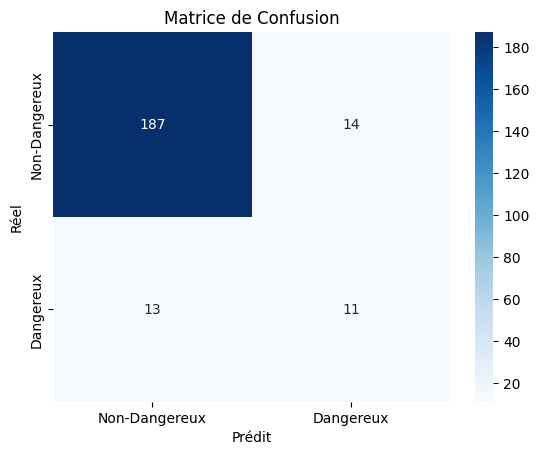

In [37]:
# Heatmap de la matrice de confusion
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Dangereux', 'Dangereux'], yticklabels=['Non-Dangereux', 'Dangereux'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()